# TT Clustering

Clustering over the TT datasets. These are categorical labels if two points in the time series interact as they should. If two points in cause and effect goes in the same direction, these are labeled as 1, if there is no relation, for example the cause has 1.5 and effect 0 implies no effect between them, so they are labeled as 0 and if its behaviour is opposite, these are labeled as -1

## 1. Preprocessing

In [8]:
import gc
import pandas as pd
import glob
import sklearn
import numpy as np

In [10]:
files=glob.glob("../data/Tt/*")
posLabels = glob.glob("../LabelOutputs/*")

In [25]:
trainIndexFiles=glob.glob("../Train/*")
frames = list()
for f in trainIndexFiles:
    indices = pd.read_csv(f,sep=";")
    indexList=list(indices['0'])
    protein = f.split("/")[-1].split(".")[0]
    fpath = '../data/Tt/'+f.split("/")[-1].split(".")[0]+".csv"
    TtRead = pd.read_csv(fpath,sep=";")
    TtPartialTrain=TtRead[TtRead.columns[5:]].loc[indexList].copy()
    TtPartialTrain.insert(0,column='Protein',value =protein )
    del TtRead
    gc.collect()
    frames.append(TtPartialTrain)

In [29]:
ttTrain = pd.concat(frames)

In [30]:
ttTrain.head()

,Protein,C0_C15~E0_E15,C15_C30~E15_E30,C30_C90~E30_E90,C90_C120~E90_E120,C120_C180~E120_E180,C180_C210~E180_E210,C210_C240~E210_E240,C240_C360~E240_E360,C0_C15~E15_E30,...,C0_C240~E15_E360,C0_C240~E0_E360,C0_C360~E240_E360,C0_C360~E210_E360,C0_C360~E180_E360,C0_C360~E120_E360,C0_C360~E90_E360,C0_C360~E30_E360,C0_C360~E15_E360,C0_C360~E0_E360
1530,LEF1,1,1,0,-1,0,0,-1,-1,1,...,-1,-1,1,0,1,1,0,-1,-1,-1
1531,LEF1,0,0,1,0,-1,1,0,1,0,...,-1,0,1,1,1,1,-1,-1,-1,0
1532,LEF1,1,1,-1,1,1,1,0,0,-1,...,-1,-1,0,0,1,0,1,-1,-1,-1
1533,LEF1,0,0,0,0,-1,0,1,-1,0,...,1,1,0,0,0,0,0,0,0,0
1535,LEF1,1,1,0,1,-1,1,0,-1,0,...,-1,-1,-1,-1,-1,0,0,1,1,1


## 2. Clustering

We will use simple clustering with Hamming distance

In [36]:
!pip install hdbscan

    100% |████████████████████████████████| 4.7MB 123kB/s ta 0:00:01
  Running setup.py bdist_wheel for hdbscan ... done
  Stored in directory: /home/a20125359/.cache/pip/wheels/3c/66/6b/d47e0a5400f27f6cb22977e0e3c8826bc7e716c5b3f3ade0cb
Successfully built hdbscan


In [37]:
import hdbscan

In [41]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='hamming', min_cluster_size=5, min_samples=None, p=None)

In [42]:
clusterer.fit(ttTrain[ttTrain.columns[1:]])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='hamming', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

In [50]:
clusterer.labels_.max()

514

In [51]:
len(ttTrain)

15998

In [52]:
clusterer.probabilities_

array([ 0.,  0.,  1., ...,  0.,  1.,  0.])

In [54]:
!pip install seaborn

    100% |████████████████████████████████| 184kB 777kB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/a20125359/.cache/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

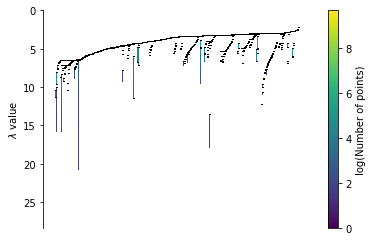

In [70]:
clusterer.condensed_tree_.plot()

In [60]:
clusterer.condensed_tree_.to_pandas().to_csv('../ClusteringOutputs/TT_Clustering/tt_condensed_tree.csv')

In [66]:
pd.DataFrame(clusterer.labels_).to_csv('../ClusteringOutputs/TT_Clustering/tt_labels.csv')

In [76]:
clusterer.condensed_tree_.to_pandas()['child_size'].unique()

array([    1, 15973,     5, 15900,    19, 15860,    27,     6, 15842,
       15830, 15818,     9, 15809, 15780,    16,    10, 15754, 15737,
          17, 15730,     7, 15723, 15714, 15706, 15334,   353, 15305,
          25, 15295,    18, 15281,    11, 15271, 15264, 15249,    12,
       15220, 15214, 15206, 15194,     8, 14825,   369,   364, 14809,
          13,   350, 14788,    15, 14775,   331, 14745, 14734, 14719,
       14705, 14029,   676,   257, 14010, 13159,   851,   243, 13141,
       13122,   841,   659, 13105,   230, 13073,   644, 13041,    32,
       11662,  1374,  1350,    21, 11654, 11637,    14,   198,   309,
         317, 11627,  1002,   342, 11619, 11613, 11274,   339, 11268,
       11261,   992, 11255,   304, 11233,    20, 11202,    29,   324,
       11196, 11170,   282,   167,   968,   154, 11130,    37,   956,
         948, 11115, 11097,   938,   226, 10269,   825,   925, 10245,
       10240,   775, 10226,   766, 10207,   247,   756, 10191, 10148,
          41,    33,

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver='full')
pca.fit(ttTrain[ttTrain.columns[1:]])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [78]:
pca_3d = pca.transform(ttTrain[ttTrain.columns[1:]]).T

In [79]:
len(pca_3d)

3

In [80]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
x=pca_3d[0]
y=pca_3d[1]
z=pca_3d[2]

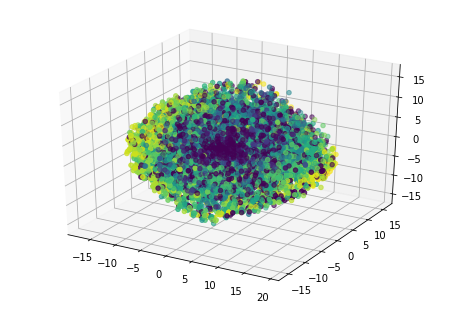

In [82]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z,c=clusterer.labels_)
pyplot.show()